/tmp/ipython-input-2213219207.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)


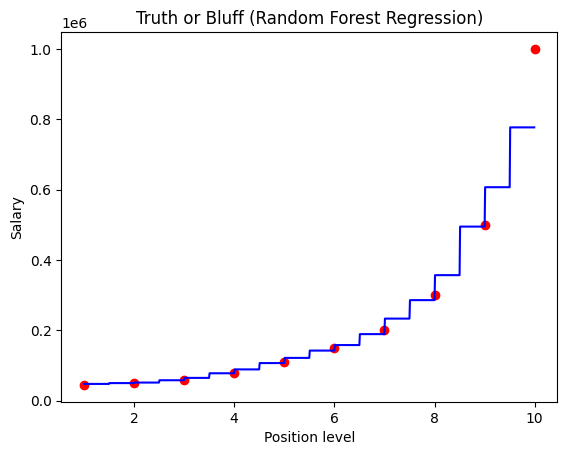

'\n回帰木は「区間ごとに一定値を予測する」モデル\nランダムフォレストは「複数の木の平均」\n→ その結果 細かい階段状の線 になる\n'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dt = pd.read_csv('Position_Salaries.csv')
X = dt.iloc[:, 1:-1].values
y = dt.iloc[:, -1].values

#ランダムフォレスト回帰モデルを作り、データ X（説明変数） と y（目的変数）で学習させる
#n_estimatorsは決定木の本数。多いほうが精度が高くなるが、多すぎると過学習になる
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 100, random_state = 0)
reg.fit(X, y)

X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
#scikit-learn は、2次元配列（行 × 列）じゃないと受け取れない
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, reg.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

"""
回帰木は「区間ごとに一定値を予測する」モデル
ランダムフォレストは「複数の木の平均」
→ その結果 細かい階段状の線 になる
"""

"""
ランダムフォレスト回帰を用いて、Position level から Salary を予測するモデルを学習した。
複数の決定木を作り、その平均で予測することで、回帰木より安定した高精度なモデルを構築できた。
n_estimators=100 により、100本の木の集合知で滑らかな階段状の予測曲線を得られた。
min〜max を0.01刻みで並べた X_grid によって、モデルの予測挙動を細かく可視化した。
ランダムフォレストを通じて、単一の木よりもアンサンブル学習が強力であることを理解できた。

"""
